In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#load dataset 
# Columns: target, ids, date, flag, user, text
df = pd.read_csv('../data/sentiment140.csv',encoding='Latin-1',names=['target', 'ids', 'date', 'flag', 'user', 'text'])

#display first 5 rows
print('First 5 rows of the dataset :')
print(df.head())

First 5 rows of the dataset :
   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  


In [5]:
#display dataset info
print('\nDataset Information :')
print(df.info())


Dataset Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None


In [7]:
#check for missing values
print('\nMissing Values in each column :')
print(df.isnull().sum())


Missing Values in each column :
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


In [8]:
# Sentiment distribution
print ('\nSentiment Distribution :')
print(df['target'].value_counts()) 


Sentiment Distribution :
target
0    800000
4    800000
Name: count, dtype: int64


In [10]:
# Replace 4 with 1 (0=negative, 1=positive)
df['target'] = df['target'].replace(4, 1) 
print('\nUpdated Sentiment Distribution :')
print(df['target'].value_counts()) 


Updated Sentiment Distribution :
target
0    800000
1    800000
Name: count, dtype: int64


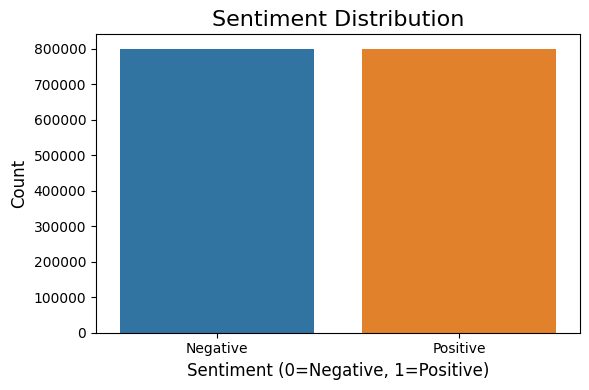

In [13]:
# Visualize sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.title('Sentiment Distribution',fontsize=16) 
plt.xlabel('Sentiment (0=Negative, 1=Positive)',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks([0,1], ['Negative', 'Positive'])
plt.tight_layout()
plt.savefig('../notebooks/sentiment_distribution.png')
plt.show()

In [14]:
#Sample negative tweets 
print('\nSample Negative Tweet :')
print(df[df['target']==0]['text'].head(3).values)

#Sample positive tweets
print("\nSample Positive Tweets:")
print(df[df['target']==1]['text'].head(3).values)


Sample Negative Tweet :
["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds']

Sample Positive Tweets:
['I LOVE @Health4UandPets u guys r the best!! '
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ']


In [16]:
#Tweet length analysis
df['tweet_length'] = df ['text'].apply(len)

print("\nAverage tweet length:", df['tweet_length'].mean())
print("Max tweet length:", df['tweet_length'].max())
print("Min tweet length:", df['tweet_length'].min())


Average tweet length: 74.096498125
Max tweet length: 803
Min tweet length: 6


In [19]:
#Save cleaned dataset
df_clean = df[['target', 'text']]
print('\nCleaned dataset preview :')
print(df_clean.head())
df_clean.to_csv('../data/sentiment140_cleaned.csv', index=False)
print('\nCleaned dataset saved to ../data/sentiment140_cleaned.csv')


Cleaned dataset preview :
   target                                               text
0       0  @switchfoot http://twitpic.com/2y1zl - Awww, t...
1       0  is upset that he can't update his Facebook by ...
2       0  @Kenichan I dived many times for the ball. Man...
3       0    my whole body feels itchy and like its on fire 
4       0  @nationwideclass no, it's not behaving at all....

Cleaned dataset saved to ../data/sentiment140_cleaned.csv
